# Support Vector Machine (SVM)
## 1. Formulation mathématique
---
### 1.1 Enonciation du problème
#### 1.1.1 Définition des paramètres d'entrée (dataset)

On considère, comme pour les autres modèles déjà mentionnés précédment, un dataset $S$ de taille $N$ tel que : 

$$
S = \{ (X_{1}, y_{1}), \dots, (X_{N}, y_{N}) \}, \quad \forall x_{i}, y_{i} \in \mathcal{X} \times \mathcal{Y}
$$

avec : 

1. $(X_{i})_{i \in \mathbb{N}^{*}} =  ((x_{1,i}, \dots, x_{m,i} ))_{i, m \in \mathbb{N}^{*}} \in \mathbb{R}^{m} = \mathcal{X}, \quad \forall x_{m, i} \in \mathbb{R}$ l'échantillon de $m$ features associé à l'élément $y_{i}$ de la classe -1 ou 1. 
2. $\mathcal{X}$ : l'ensemble des observations, ou ensemble des entrées.
3. $\mathcal{Y}$ : l'ensemble des sorties.

On peut le voir d'une autre manière, à savoir :

$$
S = (y, X)
$$

avec : 

$$
X =  
   \begin{bmatrix}
    x_{1,1} & \dots & x_{1,n} \\
    \vdots & x_{i,n} & \vdots \\
    x_{n,1} & \dots & x_{n,n} \\
   \end{bmatrix} \in \mathcal{M}_{N,m}, \quad
   Y = 
    \begin{bmatrix}
    y_{1}  \\
    \vdots \\
    y_{N}  \\
   \end{bmatrix} \in \mathbb{R}^{N}
$$

#### 1.1.2 Problématique
Le modèle SVM, ou *Support Vector Machine* est un modèle d'apprentissage supervisé qui permet d'identifer un séparateur entre deux classes. En d'autres termes, le problème revient à chosir un séparateur adapté qui sépare deux classes. En ce sens, qu'est-ce qu'un séparateur ? Considérons un ensemble de vecteurs $v_{i} \in \mathbb{R}^{n}$ séparés en deux groupes, i.e. en deux classes. Les deux classes peuvent êtres labelisées en tant que "groupe 1" et "groupe 2" ou tout simplement peuvent prendre les valeurs $-1$ ou $1$ de telle sorte que l'ensemble des sorties, $\mathcal{Y}$, s'exprime sous la forme : 

$$
\mathcal{Y} = \{-1;1\}
$$

soit : 

$$
y_{i} \in \mathcal{Y} = \{-1;1\}
$$

**Le séparateur linéaire est donc l'hyperplan dans $\mathbb{R}^{n}$ qui s'exprime sous la forme suivante :**

$$
w^Tx + b = 0
$$

tel que : 

$$
\left\{
\begin{eqnarray}
w^{T}x_{i} + b > 1 \quad \text{si} \qquad y_i = 1\\
w^{T}x_{i} + b > -1 \quad \text{si} \qquad y_i = -1\\
\end{eqnarray}
\right.
$$

avec : 

1. $w \in \mathbb{R}^{n}$ : vecteur des poids, ce sont les hyperparamètres à optimiser dans le modèle 

Les prédictions du modèle deviennent : 

$$
\hat{y_{i}} = \sign({w^{T}x_{i} + b})
$$

En prenant $\mathcal{X} = \mathbb{R}$, on peut représenter le plan qui sépare les deux classes : 

<div align="center">
  <img src="src/pics/SVR.webp" alt="a" width="750" height="500">
</div>


**La marge, i.e. la distance entre les ploints les plus rapprochés du plan pour chaque classe est égale à $\frac{2}{||w||}$. On cherche à maximiser la marge entre les deux points les plus rapprochés du plan pour chaque classe (les vecteurs supports), c'est à dire trouver :**

$$
max(\text{marge}) = \max_{w, b} \frac{2}{||w||}
$$

Maximiser $\frac{2}{||w||}$ revient à minimiser $||w||$ ou bien $||w||²$. On se ramène donc à un **problème d'optimisation convexe** tel que : 

$$
\max_{w, b} \frac{2}{||w||} = \min_{w, b} \frac{1}{2}||w||²
$$

sous contraintes : 

$$
y_{i}(w^{T}x_{i} + b) > 1, \quad \forall i \in \mathbb{N}^{*}
$$

#### 1.2 Résolution du problème d'optimisation convexe sous contraintes

On cherche alors à trouver les valeurs des poids du vecteur $w$ à l'aide d'algorithmes d'optimisation convexe. Ces algorithmes incluent : 

##### 1.2.1 Résolution exacte par des algorithmes dits QP (quadratic Programming) pour la résolution du problème dual comme
* Le gradient projetté
* La métode des multiplicateurs de Lagrange (KKT)
* La méthode de Newton
  
qui sont des algorithmes coûteux $\mathcal{O}(n³)$. Pour des gros datasets, on préfère utiliser les méthodes itératives.

##### 1.2.2 Méthodes itératives 
* Sequential Minimal optimization (SMO) - utilisée par sklearn
* Sochastic Gradient Descent (SGD)
* Coordinate descent

Pour aller plus loin, voir 0.3.Convex_Problems_Algorithms.ipynb

#### 1.3 Evaluation des performances du modèle - métriques

Pour les modèles de classification (SVM, C-SVC, $\nu$-SVC) :

##### 1.3.1 Accuracy score

L'accuracy score mesure la proportion de prédictions correctes, c'est-à-dire la quantité de classes prédites correctement.  

$$
\text{AC-score} = \frac{1}{n}\sum_{i=1}^{n}\mathbb{1}(\hat{y_{i}} = y_{i})
$$

Avec : 

* $\mathbb{1}(\bullet)$ : fonction indicatrice. $\mathbb{1}_{\mathcal{A}}(x) = 1$ si $x \mathcal{A}$, $0$ sinon. Plus généralement : $\mathbb{1}(\bullet) = 1$ si la condition est respectée, $0$ sinon.
* $\hat{y_{i}}$ : estimateur de $y_{i}$ en utilisant la méthode d'estimation présentée dans la partie 1.1.2. Autrement dit, $\hat{y_{i}} = \text{sign}({w^{T}x_{i} + b})$ ou $\text{sign}$ désigne la fonction signe.

##### 1.3.2 Précision

$$
\text{presion} = \frac{TP}{TP + FP} 
$$

##### 1.3.3 Rappel

$$
\text{recall} = \frac{TP}{TP + FN} 
$$

##### 1.3.4 F-1 Score

$$
\text{F1-score} = \frac{precision \times recall}{precision + recall}
$$

Avec : 

* FP : faux positifs
* TP : vrai positif
* FN : faux négatif
* TN : vrai négatifs

##### 1.3.5 Matrice de confusion

$$
\text{confusion matrix} = 
\begin{bmatrix} 
    TP & FP \\
    FN & TN
\end{bmatrix} 
$$

##### 1.3.6 ROC-AUC

$$

$$


##### 1.3.7 Marge moyenne

Pour les problèmes de régression (SVR, $\epsilon$-SVR, $\nu$-SVR) :

#####

## 2. Des exemples en Python
---
#### 2.1 Import des librairies

In [24]:
# Maths
import numpy as np

# Graphs
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Dataset
from sklearn.datasets import load_iris

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Trainning
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import accuracy_score

# Load / import models
from joblib import dump, load

#### 2.2 Import du dataset

Ici, on travialle avec le dataset iris, disponible dans la librairie scikit-learn.

In [25]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df["species"] = iris.target
species_names = iris.target_names
df['species'] = df['species'].apply(lambda x: species_names[x])

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Etant donné que le SVM est un modèle de classification, on se propose de prédire l'espèce de la fleur en fonction de la taille de son sépal et de ses pétales. La variable cible est donc "**species**".

In [26]:
target = "species"
X = df.drop(target, axis=1)
y = df[target]

In [27]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [28]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

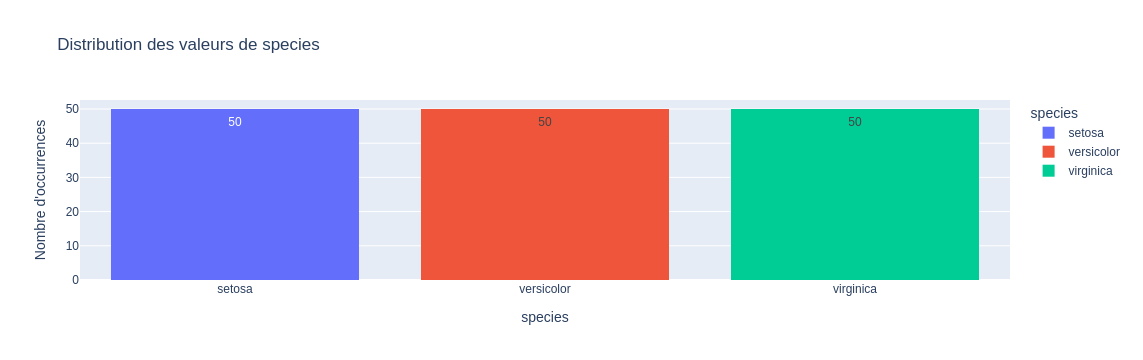

In [29]:
fig = px.histogram(
    df,
    x=target,           
    title=f"Distribution des valeurs de {target}",
    color=target,       
    text_auto=True      
)
fig.update_layout(
    xaxis_title=target,
    yaxis_title="Nombre d'occurrences",
    bargap=0.2
)
fig.show()

Ici, pas de problème d'équilibrage de classes dans les espèces, on peut continuer.

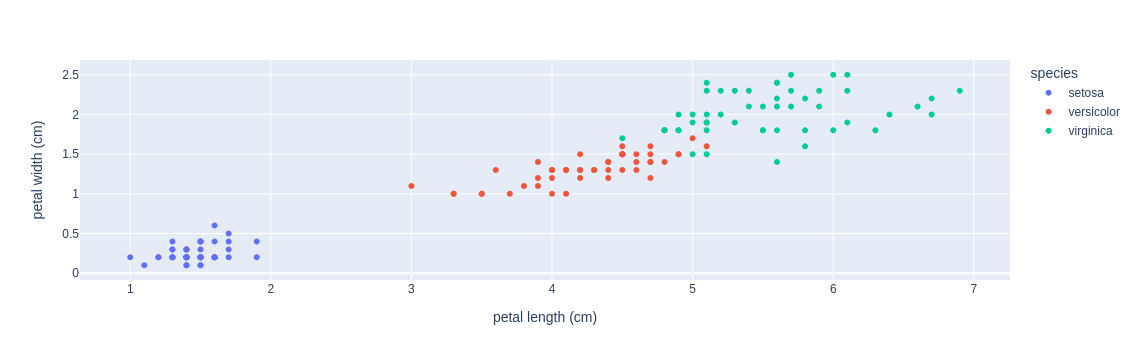

In [30]:
px.scatter(
    df,
    x="petal length (cm)",
    y="petal width (cm)",
    color="species"
)

Si on s'en tient à la figure 1, on remarque, en prenant uniquement deux features du dataset, qu'il y a bien 3 groupes de points bien distinct (i.e. 3 espèces différentes). Si on reprend les 4 features de $X$ qui nous permettent de prédire l'espèce, on cherchera donc à trouver les hyperplans qui permettent de séparer ces différentes espèces.

#### 2.3 Séparation $X_{train}$, $X_{test}$

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### 2.4 Normalisation des données

In [32]:
scaler = StandardScaler() # Initialisation du modèle de scaling

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 2.5 Entraînement du modèle

Le modèle SVM avec les hyperpramètres de base est en réalité un C-SVC (voir partie 2 - C-Support Vector Classification (C-SVC)) avec les paramètres suivants :

* C = 1.0
* kernel : rbf
* $\gamma$ : auto

In [33]:
svc = SVC()                  # Initialisation du modèle
svc.fit(X_train,y_train)   # Entraînement du modèle

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


#### 2.6 Prédicitons du modèle

In [34]:
y_pred = svc.predict(X_test) # Prédicitons sur les données de test

#### 2.7 Métriques

In [35]:
accuracy_score(y_test, y_pred)

1.0

On a un accuracy score de 1, ce qui est indicateur d'overfitting. Or, d'apères le nuage de points qui trace la largeur des pétales en fonction de la longueur des pétales, on constate que les classes sont entièrement séparables. On se propose alors de générer plusieurs seeds du dataset lors du *random sampling* (i.e. le tirage aléatoire des échantillons de train et de test) pour savoir si c'est bien un cas d'overfitting ou si le modèle arrive à  séparer parfaitement les classes avec les données disponibles.

In [44]:
accuracies = []
for seed in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    svc = SVC()
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

accuracies

[1.0,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.8666666666666667,
 0.9333333333333333,
 1.0]

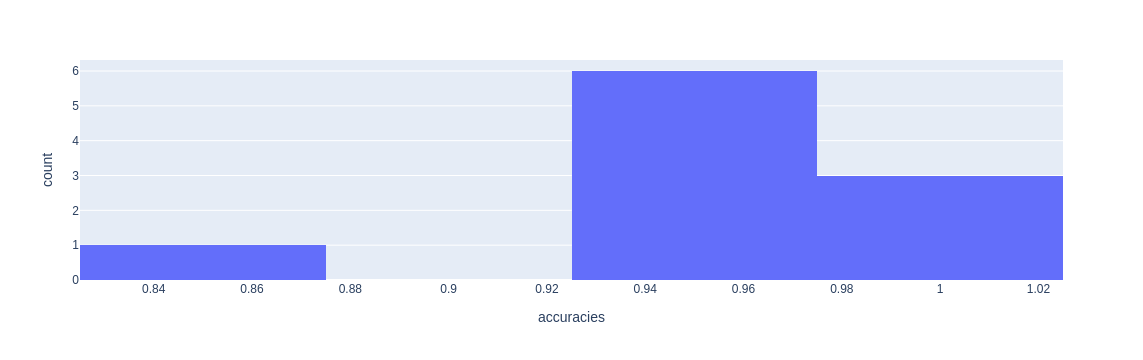

In [45]:
df_acc = pd.DataFrame({"accuracies" : accuracies})

px.histogram(df_acc, x="accuracies")

In [47]:
float("{:.3f}".format(sum(accuracies)/len(accuracies)))

0.957

On constate qu'en fonction du *random sampling*, l'accuracy score n'est pas le même. En moyenne, on tombe à un accuracy score de 9.97, qui reste un très bon score mais plus cohérent. Ce n'est donc pas un cas d'overfitting mais bien du fait que le dataset proposé est très simple et le modèle arrive à séparer les classes correctement. 

#### 2.8 Déploiement du modèle

Enregistrement du modèle

In [48]:
dump(svc, 'SVM.joblib') # Enregistrement du modèle

['SVM.joblib']

Import du modèle 

In [49]:
model = load('SVM.joblib') # Recharge du modèle

On vérifie que le modèle marche bien

In [50]:
x = np.array([4.0, 3.0, 1.0, 0.5]).reshape(1, -1) # Nouvel échantillon inconnu
y_pred = model.predict(x) # Prédiction sur l'échantillon
y_pred[0]

'virginica'

---
## C-Support Vector Classification (C-SVC)

On reprend le modèle SVM classique. On cherche donc un hyperplan $w^Tx + b = 0$ tel que les deux classes $y_{i} \in \{-1;1\}$ soient le mieux séparées possible. Dans ce cas, **les classes ne sont pas séparables** et on s'autorise une erreur sur les points tout en esseyant de maximiser la marge. Le problème d'optimisation convexe contient alors la combinaison linéaires entre la norme du vecteur de poids $w$ et un terme d'erreur (violation de la marge). Le problème d'optimisation osus contraintes est alors :

$$
\min_{w,b, \xi_i}{\frac{1}{2}||w||² + C\sum_{i=1}^{n}\xi_{i}}
$$

sous contraines :

$$
\left\{
\begin{eqnarray}
y_{i}(w^{T}x_{i} + b) > 1 \quad \text{pas d'erreur de classification}\\
0 < y_{i}(w^{T}x_{i} + b) < 1 \quad \text{terme d'erreur : le point est dans la marge}\\
y_{i}(w^{T}x_{i} + b) < 0 \quad \text{erreur forte : le point est dans la mauvaise classe}
\end{eqnarray}
\right.
$$

Avec : 

* $\xi_{i}$ : les écarts des points par rapport à la marge
* 

---
## Support Vector Regressor (SVR)

In [42]:
!jupyter nbconvert --to script 4.SVM.ipynb

[NbConvertApp] Converting notebook 4.SVM.ipynb to script
[NbConvertApp] Writing 7110 bytes to 4.SVM.py
